# Heart Disease dataset EDA

In [1]:
import pandas as pd 
# import numpy as np
import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split

# from sklearn.base import BaseEstimator
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
DATA_PATH = '../data/heart_cleveland_upload.csv'

Dataset full description is available at https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [3]:
data = pd.read_csv(DATA_PATH)
print(data.shape)
data.head()

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


## Feature plots

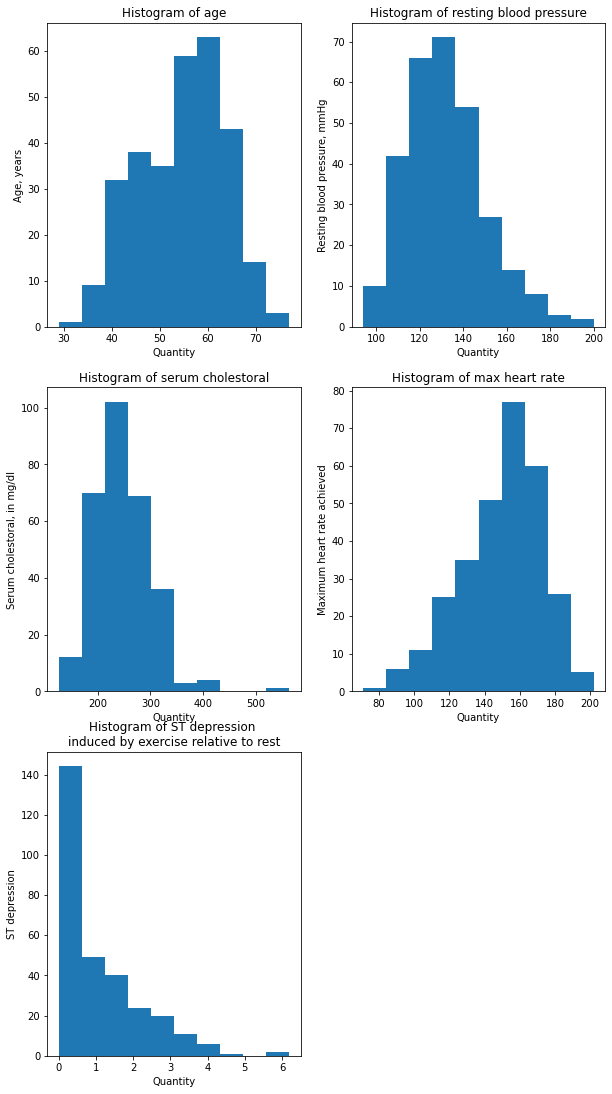

In [6]:
plt.figure(figsize=(10, 19))

quantitive_col_names = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
quantitive_title_addition = [
    'age', 'resting blood pressure', 'serum cholestoral', 'max heart rate',
    'ST depression \ninduced by exercise relative to rest'
    ]

quantitive_ylabels = [
    'Age, years', 'Resting blood pressure, mmHg', 'Serum cholestoral, in mg/dl',
    'Maximum heart rate achieved', 'ST depression'
    ]

for col_name, title, ylabel, i in zip(
    quantitive_col_names, quantitive_title_addition, quantitive_ylabels,
    range(1, 6)
    ):
    plt.subplot(3, 2, i)
    plt.title(f'Histogram of {title}')
    plt.hist(data[col_name])
    plt.ylabel(ylabel)
    plt.xlabel('Quantity')

plt.show();

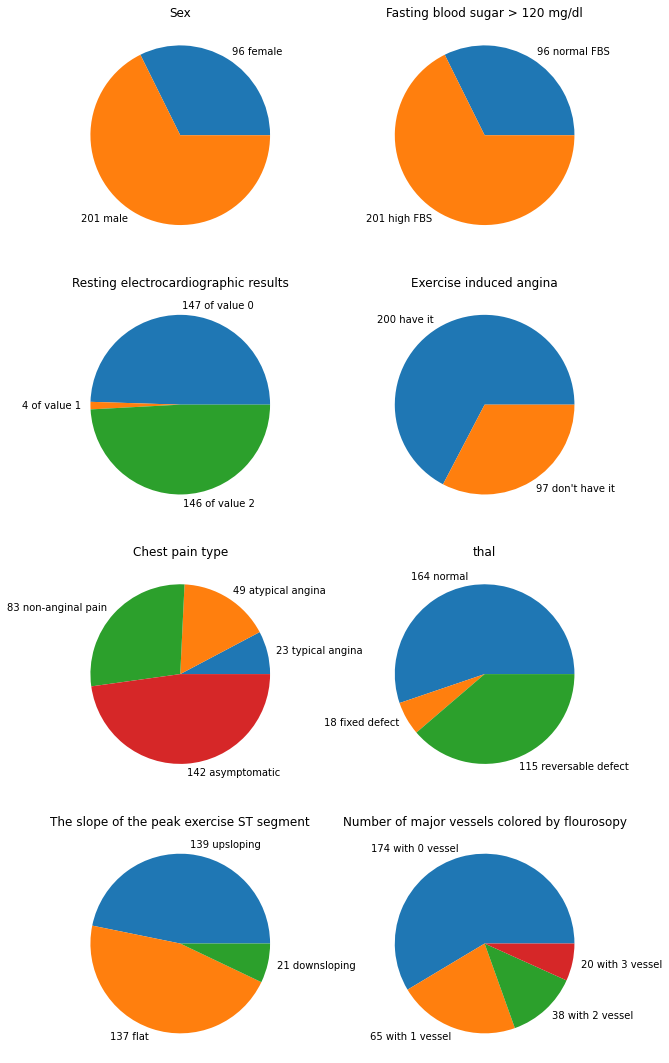

In [7]:
plt.figure(figsize=(10, 19))

plt.subplot(4, 2, 1)
counts = data.sex.value_counts()
values = [counts[0], counts[1]]
labels = [f'{values[0]} female', f'{values[1]} male']
plt.title('Sex')
plt.pie(values, labels=labels)

plt.subplot(4, 2, 2)
counts = data.sex.value_counts()
values = [counts[0], counts[1]]
labels = [f'{values[0]} normal FBS', f'{values[1]} high FBS']
plt.title('Fasting blood sugar > 120 mg/dl')
plt.pie(values, labels=labels)

plt.subplot(4, 2, 3)
counts = data.restecg.value_counts()
values = [counts[0], counts[1], counts[2]]
labels = [f'{values[i]} of value {i}' for i in range(3)]
plt.title('Resting electrocardiographic results')
plt.pie(values, labels=labels)

plt.subplot(4, 2, 4)
counts = data.exang.value_counts()
values = [counts[0], counts[1]]
labels = [f'{values[0]} have it', f'{values[1]} don\'t have it']
plt.title('Exercise induced angina')
plt.pie(values, labels=labels)

plt.subplot(4, 2, 5)
counts = data.cp.value_counts()
values = [counts[0], counts[1], counts[2], counts[3]]
labels = [f'{values[0]} typical angina',
          f'{values[1]} atypical angina',
          f'{values[2]} non-anginal pain',
          f'{values[3]} asymptomatic']
plt.title('Chest pain type')
plt.pie(values, labels=labels)

plt.subplot(4, 2, 6)
counts = data.thal.value_counts()
values = [counts[0], counts[1], counts[2]]
labels = [f'{values[0]} normal',
          f'{values[1]} fixed defect',
          f'{values[2]} reversable defect']
plt.title('thal')
plt.pie(values, labels=labels)

plt.subplot(4, 2, 7)
counts = data.slope.value_counts()
values = [counts[0], counts[1], counts[2]]
labels = [f'{values[0]} upsloping',
          f'{values[1]} flat',
          f'{values[2]} downsloping']
plt.title('The slope of the peak exercise ST segment')
plt.pie(values, labels=labels)

plt.subplot(4, 2, 8)
counts = data.ca.value_counts()
values = [counts[i] for i in range(4)]
labels = [f'{values[i]} with {i} vessel' for i in range(4)]
plt.title('Number of major vessels colored by flourosopy')
plt.pie(values, labels=labels)

plt.show()

Resting electrocardiographic results:

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

## Target plot

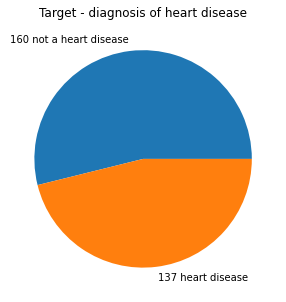

In [8]:
plt.figure(figsize=(10, 5))
values = [data.condition.value_counts()[0], data.condition.value_counts()[1]]
labels = [f'{values[0]} not a heart disease', f'{values[1]} heart disease']

plt.title('Target - diagnosis of heart disease')
plt.pie(values, labels=labels)
plt.show();